<center><image src="https://drive.google.com/uc?id=1n3G4TdK_u6PQHcLrxB_A0HijNdigXmUH">

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ, 2024</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

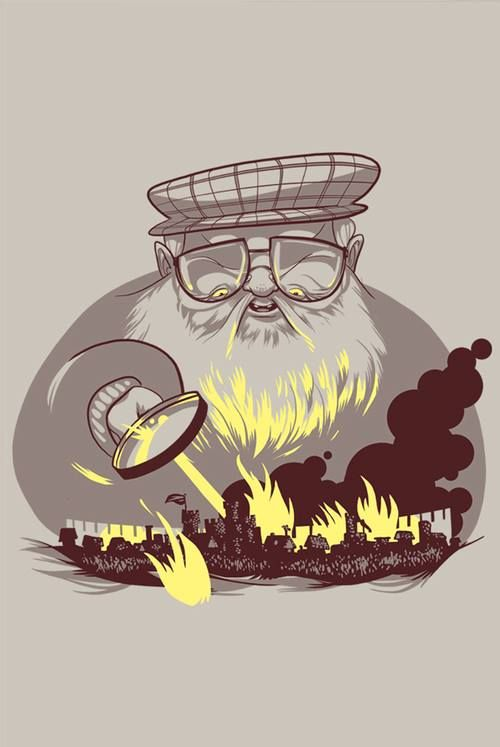

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **DateoFdeath**: дата смерти

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

In [2017]:
!gdown 1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S # test dataset
!gdown 1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV # train dataset

Downloading...
From: https://drive.google.com/uc?id=1ANEFC_GKeJm4GCx1Xd202gkAgqK2Bm4S
To: /home/leo/PycharmProjects/DLS/game_of_thrones_test.csv
100%|██████████████████████████████████████| 38.3k/38.3k [00:00<00:00, 86.7kB/s]
Downloading...
From: https://drive.google.com/uc?id=1oSX7B5YhS6vQseTsQZYryu44HxSq6ZWV
To: /home/leo/PycharmProjects/DLS/game_of_thrones_train.csv
100%|█████████████████████████████████████████| 141k/141k [00:00<00:00, 155kB/s]


**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [2018]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import category_encoders as ec

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [2019]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')

In [2020]:
data.head(10)

,name,title,male,culture,dateOfBirth,DateoFdeath,mother,father,heir,house,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,NaN,House Frey,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,NaN,House Swyft,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,105.0,NaN,NaN,NaN,House Arryn,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,NaN,House Santagar,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
6,Tommen Baratheon,NaN,1,NaN,NaN,NaN,Cersei Lannister,Robert Baratheon,Myrcella Baratheon,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,1.000000,1
7,Valarr Targaryen,Hand of the King,1,Valyrian,183.0,209.0,NaN,NaN,NaN,House Targaryen,...,NaN,NaN,NaN,1.0,1,1,26.0,0,0.431438,0
8,Viserys I Targaryen,NaN,1,NaN,NaN,NaN,Alyssa Targaryen,Baelon Targaryen,Rhaenyra Targaryen,NaN,...,1.0,1.0,1.0,NaN,0,0,NaN,5,0.678930,0
9,Wilbert,Ser,1,NaN,NaN,298.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.006689,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [2021]:
data.shape

(1557, 26)

In [2022]:
# посмотрим на пропущенные значения в процентном соотношении
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)


mother              0.988439
isAliveMother       0.988439
isAliveHeir         0.986513
heir                0.986513
father              0.985870
isAliveFather       0.985870
spouse              0.871548
isAliveSpouse       0.871548
age                 0.820809
dateOfBirth         0.820809
DateoFdeath         0.802826
culture             0.686577
title               0.539499
house               0.244701
male                0.000000
name                0.000000
book3               0.000000
book1               0.000000
book4               0.000000
book5               0.000000
book2               0.000000
isMarried           0.000000
isNoble             0.000000
numDeadRelations    0.000000
popularity          0.000000
isAlive             0.000000
dtype: float64

In [2023]:
# можно сразу удалить признаки где больше 70% пропущенных значений т.к они не несут в себе никакой информации (слишком много пропусков либо просто не нужны) кроме DateoFdeath, ведь если персонаж жив, то и дата смерти будет пропущена (предположение)

data.drop(columns=['mother', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'heir', 'father', 'spouse', 'isAliveSpouse', 'age', 'dateOfBirth', 'name'], inplace = True)

In [2024]:
data.head()

,title,male,culture,DateoFdeath,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,NaN,0,0,0,0,0,0,0,11,0.605351,0
2,Lord of the Crossing,1,Rivermen,NaN,House Frey,1,1,1,1,1,1,1,1,0.896321,1
3,Ser,1,NaN,NaN,House Swyft,0,0,0,1,0,0,1,0,0.267559,1
4,Queen,0,NaN,105.0,House Arryn,0,0,0,0,0,1,1,0,0.183946,0
5,Greenstone,0,Dornish,NaN,House Santagar,0,0,0,1,0,1,1,0,0.043478,1


In [2025]:
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

DateoFdeath         0.802826
culture             0.686577
title               0.539499
house               0.244701
male                0.000000
book1               0.000000
book2               0.000000
book3               0.000000
book4               0.000000
book5               0.000000
isMarried           0.000000
isNoble             0.000000
numDeadRelations    0.000000
popularity          0.000000
isAlive             0.000000
dtype: float64

In [2026]:
# посмотрим на кол-во уникальных значений в каждом столбце
data.nunique()

title               195
male                  2
culture              51
DateoFdeath          61
house               315
book1                 2
book2                 2
book3                 2
book4                 2
book5                 2
isMarried             2
isNoble               2
numDeadRelations     14
popularity          117
isAlive               2
dtype: int64

In [2027]:
# у признака house очень много уникальных значений, можно удалить
data.drop(columns=['house'], inplace = True)

In [2028]:
data.head()

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,0,0,0,0,0,0,0,11,0.605351,0
2,Lord of the Crossing,1,Rivermen,NaN,1,1,1,1,1,1,1,1,0.896321,1
3,Ser,1,NaN,NaN,0,0,0,1,0,0,1,0,0.267559,1
4,Queen,0,NaN,105.0,0,0,0,0,0,1,1,0,0.183946,0
5,Greenstone,0,Dornish,NaN,0,0,0,1,0,1,1,0,0.043478,1


**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [2029]:
# создадим признак isPopular
data['isPopular'] = data['popularity'] > 0.5
data['isPopular'] = data['isPopular'].astype(int)
data.head()

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular
S.No,,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,0,0,0,0,0,0,0,11,0.605351,0,1
2,Lord of the Crossing,1,Rivermen,NaN,1,1,1,1,1,1,1,1,0.896321,1,1
3,Ser,1,NaN,NaN,0,0,0,1,0,0,1,0,0.267559,1,0
4,Queen,0,NaN,105.0,0,0,0,0,0,1,1,0,0.183946,0,0
5,Greenstone,0,Dornish,NaN,0,0,0,1,0,1,1,0,0.043478,1,0


In [2030]:
# создадим признак boolDeadRelations
data['boolDeadRelations'] = data['numDeadRelations'] > 0
data['boolDeadRelations'] = data['boolDeadRelations'].astype(int)
data.head()

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,0,0,0,0,0,0,0,11,0.605351,0,1,1
2,Lord of the Crossing,1,Rivermen,NaN,1,1,1,1,1,1,1,1,0.896321,1,1,1
3,Ser,1,NaN,NaN,0,0,0,1,0,0,1,0,0.267559,1,0,0
4,Queen,0,NaN,105.0,0,0,0,0,0,1,1,0,0.183946,0,0,0
5,Greenstone,0,Dornish,NaN,0,0,0,1,0,1,1,0,0.043478,1,0,0


In [2031]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [2032]:
def replace_cultures(culture):
    for key, values in cult.items():
        if str(culture).lower() in values:
            return key
    return culture

data['culture'] = data['culture'].apply(replace_cultures)

In [2033]:
data_temp = data

In [2034]:
data

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,NaN,1,NaN,NaN,0,0,0,0,0,0,0,11,0.605351,0,1,1
2,Lord of the Crossing,1,Rivermen,NaN,1,1,1,1,1,1,1,1,0.896321,1,1,1
3,Ser,1,NaN,NaN,0,0,0,1,0,0,1,0,0.267559,1,0,0
4,Queen,0,NaN,105.0,0,0,0,0,0,1,1,0,0.183946,0,0,0
5,Greenstone,0,Dornish,NaN,0,0,0,1,0,1,1,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Archmaester,1,NaN,NaN,1,0,1,1,0,0,1,0,0.160535,1,0,0
1554,NaN,0,NaN,298.0,1,1,0,0,0,0,0,0,0.040134,0,0,0
1555,NaN,1,NaN,299.0,0,1,1,1,1,0,0,0,0.076923,0,0,0


**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

In [2035]:
# Заменим пропуски в culture и title на Unknown (для того чтобы потом обучить на тест выборке)
data['culture'] = data['culture'].fillna('Unknown')
data['title'] = data['title'].fillna('Unknown')

In [2036]:
# закодируем culture и title с помощью LeaveOneOutEncoder
encoder = ec.LeaveOneOutEncoder()
data['culture'] = encoder.fit_transform(data['culture'], data['isAlive'])
data['title'] = encoder.fit_transform(data['title'], data['isAlive'])

<Axes: >

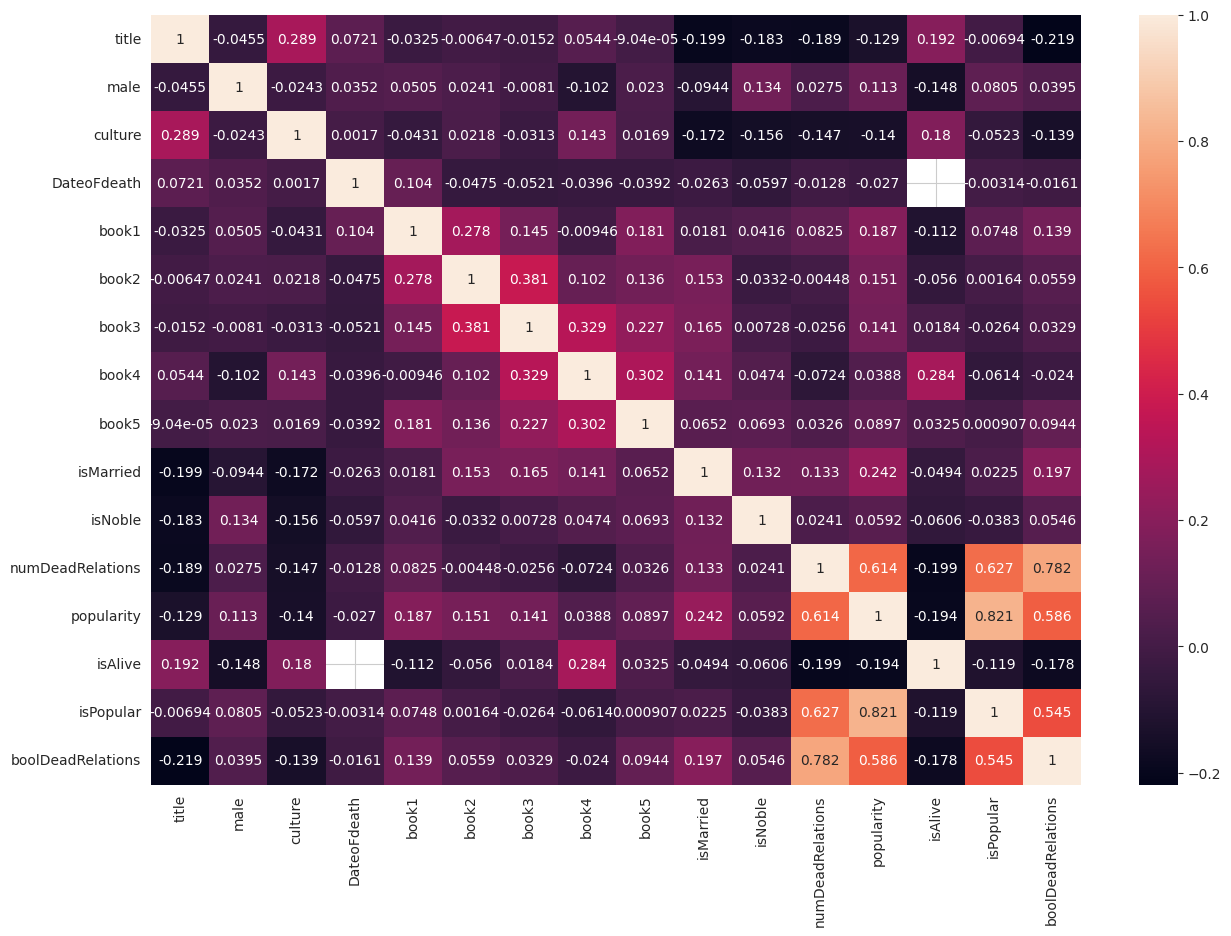

In [2037]:
plt.figure(figsize=(15, 10))
sns.heatmap(data.corr(), annot=True, fmt=".3g")

In [2038]:
data

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,0.800954,1,0.781835,NaN,0,0,0,0,0,0,0,11,0.605351,0,1,1
2,0.778420,1,0.666667,NaN,1,1,1,1,1,1,1,1,0.896321,1,1,1
3,0.773770,1,0.780899,NaN,0,0,0,1,0,0,1,0,0.267559,1,0,0
4,0.000000,0,0.781835,105.0,0,0,0,0,0,1,1,0,0.183946,0,0,0
5,0.778420,0,0.950000,NaN,0,0,0,1,0,1,1,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1.000000,1,0.780899,NaN,1,0,1,1,0,0,1,0,0.160535,1,0,0
1554,0.800954,0,0.781835,298.0,1,1,0,0,0,0,0,0,0.040134,0,0,0
1555,0.800954,1,0.781835,299.0,0,1,1,1,1,0,0,0,0.076923,0,0,0


**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [2039]:
# как мы убедились выше, целевая переменная - категориальная

# Посмотрим, сколько уникальных значений в целевой переменной
print(data['isAlive'].value_counts())

# Проверим процентное распределение классов
print(data['isAlive'].value_counts(normalize=True) * 100)

isAlive
1    1212
0     345
Name: count, dtype: int64
isAlive
1    77.842004
0    22.157996
Name: proportion, dtype: float64


In [2040]:
"""
Классы не сбалансированы!
"""

'\nКлассы не сбалансированы!\n'

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [2041]:
# произвели этот анализ выше

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [2042]:
# уже смотрели с помощью sns.heatmap, определим также с помощью RandomForestClassifier

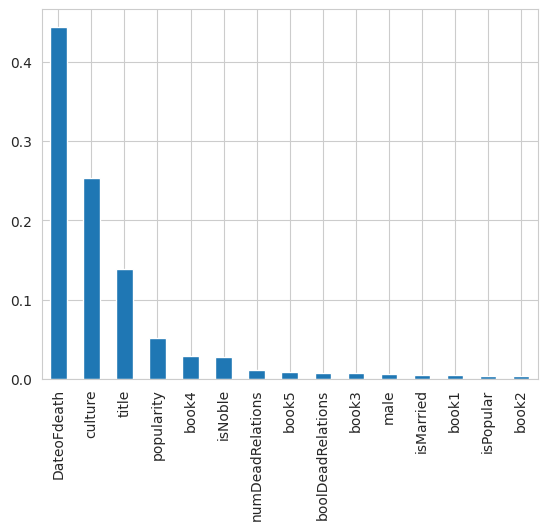

In [2043]:
from sklearn.ensemble import RandomForestClassifier

X = data.drop('isAlive', axis=1)  # Признаки
y = data['isAlive']  # Целевая переменная

model = RandomForestClassifier()
model.fit(X, y)

# Важность признаков
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.show()

In [2044]:
# пропуски в DateoFdeath заполним 1, но так как значения в DateoFdeath >> 0 чтобы не ломать размерность фичей, заменим все значения > 0 на 1

data['DateoFdeath'] = data['DateoFdeath'].apply(lambda x: 1 if x > 0 else 0)

In [2045]:
data

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,
1,0.800954,1,0.781835,0,0,0,0,0,0,0,0,11,0.605351,0,1,1
2,0.778420,1,0.666667,0,1,1,1,1,1,1,1,1,0.896321,1,1,1
3,0.773770,1,0.780899,0,0,0,0,1,0,0,1,0,0.267559,1,0,0
4,0.000000,0,0.781835,1,0,0,0,0,0,1,1,0,0.183946,0,0,0
5,0.778420,0,0.950000,0,0,0,0,1,0,1,1,0,0.043478,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1.000000,1,0.780899,0,1,0,1,1,0,0,1,0,0.160535,1,0,0
1554,0.800954,0,0.781835,1,1,1,0,0,0,0,0,0,0.040134,0,0,0
1555,0.800954,1,0.781835,1,0,1,1,1,1,0,0,0,0.076923,0,0,0


In [2046]:
# проверим на всякий случайно точно ли мы избавились от пропусков
(data.isnull().sum() / data.shape[0]).sort_values(ascending=False)

title                0.0
male                 0.0
culture              0.0
DateoFdeath          0.0
book1                0.0
book2                0.0
book3                0.0
book4                0.0
book5                0.0
isMarried            0.0
isNoble              0.0
numDeadRelations     0.0
popularity           0.0
isAlive              0.0
isPopular            0.0
boolDeadRelations    0.0
dtype: float64

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [2047]:
X = data.drop('isAlive', axis=1)  # Признаки
y = data['isAlive']  # Целевая переменная

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [2048]:
from sklearn.model_selection import train_test_split

In [2049]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


В качестве примера, импортируем модель `LogisticRegression`

In [2050]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [2051]:
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [2052]:
# Будем испольность технику кросс-валидации (cross-validation) и метод подбора гиперпараметров — GridSearchCV
from sklearn.model_selection import GridSearchCV
# Шаг 1. создание модели
model = LogisticRegression()

# Шаг 2. обучение модели
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # Значения регуляризации
    'penalty': ['l1', 'l2'],       # Тип регуляризации (L1 или L2)
    'solver': ['liblinear', 'saga'],  # Алгоритмы решения для логистической регрессии (по умолчанию стоит 'lbfgs', но он больше подходит для многоклассовой классификации и поддерживает только L2 регулязацию)
    'max_iter': [3000, 4000]    # Количество итераций для сходимости
}

grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy') # cv - кол-во фолдов для кросс-валидации

#  Обучаем GridSearchCV
grid_search.fit(X_train, y_train)

best_model_logistic_regression = grid_search.best_estimator_  # Получаем модель с лучшими параметрами

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [2053]:
# Определим модель AdaBoostClassifier
ada_model = AdaBoostClassifier(algorithm='SAMME')

# Параметры для подбора с помощью GridSearchCV
param_grid_ada = {
    'n_estimators': [50, 100, 200],  # Количество слабых классификаторов
    'learning_rate': [0.01, 0.1, 1],  # Темп обучения
}

# Настройка GridSearchCV для AdaBoost
grid_search_ada = GridSearchCV(ada_model, param_grid_ada, cv=5, scoring='accuracy')

# Обучение GridSearchCV для AdaBoostClassifier
grid_search_ada.fit(X_train, y_train)

# Получаем модель с лучшими параметрами для AdaBoost
best_ada_model = grid_search_ada.best_estimator_

In [2054]:
# Определим модель RandomForestClassifier
rf_model = RandomForestClassifier()

# Параметры для подбора с помощью GridSearchCV
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Количество деревьев
    'max_depth': [None, 10, 20, 30],  # Максимальная глубина дерева
    'min_samples_split': [2, 5, 10],  # Минимальное количество образцов для разбиения узла
    'min_samples_leaf': [1, 2, 4],  # Минимальное количество образцов в листовом узле
    'bootstrap': [True, False],  # Использовать метод бутстрапа или нет
}

# Настройка GridSearchCV для RandomForest
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5, scoring='accuracy')

# Обучение GridSearchCV для RandomForestClassifier
grid_search_rf.fit(X_train, y_train)

# Получаем модель с лучшими параметрами для RandomForest
best_rf_model = grid_search_rf.best_estimator_

In [2055]:
"""
Дальше используем бейзлан
"""
# Создаем модель GaussianProcessClassifier с параметрами по умолчанию
gpc_model = GaussianProcessClassifier()

# Обучаем модель
gpc_model.fit(X_train, y_train)

# Делаем предсказания
y_pred_gpc = gpc_model.predict(X_test)

In [2056]:
# Создаем модель GaussianNB
gnb_model = GaussianNB()

# Обучаем модель
gnb_model.fit(X_train, y_train)

# Делаем предсказания
y_pred_gnb = gnb_model.predict(X_test)

In [2057]:
# Создаем модель KNeighborsClassifier
knc_model = KNeighborsClassifier()

# Обучаем модель
knc_model.fit(X_train, y_train)

# Делаем предсказания
y_pred_knc = knc_model.predict(X_test)

In [2058]:
# Создаем модель SVC
svc_model = SVC()

# Обучаем модель
svc_model.fit(X_train, y_train)

# Делаем предсказания
y_pred_svc = svc_model.predict(X_test)

In [2059]:
# Создаем модель DecisionTreeClassifier
dtc_model = DecisionTreeClassifier()

# Обучаем модель
dtc_model.fit(X_train, y_train)

# Делаем предсказания
y_pred_dtc = dtc_model.predict(X_test)

## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [2060]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [2061]:
# Шаг 3. Предсказание на тестовых данных
y_pred = best_model_logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9808


Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [2062]:
# Шаг 3. Предсказание на тестовых данных
y_pred = best_ada_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 1.0000


In [2063]:
# Шаг 3. Предсказание на тестовых данных
y_pred = best_rf_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9968


In [2064]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gpc_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9776


In [2065]:
# Шаг 3. Предсказание на тестовых данных
y_pred = gnb_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9615


In [2066]:
# Шаг 3. Предсказание на тестовых данных
y_pred = knc_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9583


In [2067]:
# Шаг 3. Предсказание на тестовых данных
y_pred = svc_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9776


In [2068]:
# Шаг 3. Предсказание на тестовых данных
y_pred = dtc_model.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Accuracy : 0.9904


Выберите лучшую модель.

In [2069]:
# best_ada_model - лучшая модель!

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [2070]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /home/leo/PycharmProjects/DLS/submission.csv
100%|██████████████████████████████████████| 2.74k/2.74k [00:00<00:00, 16.4MB/s]


In [2071]:
submission = pd.read_csv("submission.csv", index_col='S.No')

In [2072]:
data_test = pd.read_csv('game_of_thrones_test.csv', index_col='S.No')

In [2073]:
# т.к мы обрывочно обрабатывали признаки, и не составили пайплайн -> придется опять вручную их все обработать на тестовой выборке
# govno-code is here

data_test.drop(columns=['mother', 'isAliveFather', 'isAliveMother', 'isAliveHeir', 'heir', 'father', 'spouse', 'isAliveSpouse', 'age', 'dateOfBirth', 'name', 'house'], inplace = True)

data_test['isPopular'] = data_test['popularity'] > 0.5
data_test['isPopular'] = data_test['isPopular'].astype(int)
data_test.head()

# создадим признак boolDeadRelations
data_test['boolDeadRelations'] = data_test['numDeadRelations'] > 0
data_test['boolDeadRelations'] = data_test['boolDeadRelations'].astype(int)
data_test['DateoFdeath'] = data_test['DateoFdeath'].apply(lambda x: 1 if x > 0 else 0)

def replace_cultures(culture):
    for key, values in cult.items():
        if str(culture).lower() in values:
            return key
    return culture

data_test['culture'] = data_test['culture'].apply(replace_cultures)

In [2074]:
# теперь заменим значения признаков culture и title которые не встречаются в train выборке на Unknown
data_test['culture'] = data_test['culture'].fillna('Unknown')
data_test['title'] = data_test['title'].fillna('Unknown')

In [2075]:
unique_titles = data_temp['title'].unique()
unique_cultures = data_temp['culture'].unique()

# Заменяем значения в test выборке, которые не встречаются в train
data_test['title'] = data_test['title'].apply(lambda x: x if x in unique_titles else 'Unknown')
data_test['culture'] = data_test['culture'].apply(lambda x: x if x in unique_cultures else 'Unknown')

In [2076]:
data_test

,title,male,culture,DateoFdeath,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,
1558,Unknown,0,Unknown,0,0,0,0,0,1,0,0,0,0.050167,0,0
1559,Unknown,0,Unknown,0,0,1,1,1,1,0,0,0,0.745819,1,0
1560,Unknown,0,Unknown,0,0,0,1,1,0,0,0,0,0.010033,0,0
1561,Unknown,1,Unknown,0,1,1,1,1,1,0,1,0,0.220736,0,0
1562,Unknown,1,Unknown,1,1,1,1,1,1,1,0,0,0.434783,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1942,Unknown,1,Unknown,1,1,1,1,1,1,0,0,0,0.351171,0,0
1943,Unknown,1,Unknown,1,0,1,0,1,1,0,0,0,0.096990,0,0
1944,Unknown,1,Unknown,0,1,1,1,1,1,0,0,0,0.030100,0,0


In [2077]:
data_test.nunique()

title                  1
male                   2
culture                1
DateoFdeath            2
book1                  2
book2                  2
book3                  2
book4                  2
book5                  2
isMarried              2
isNoble                2
numDeadRelations      13
popularity           135
isPopular              2
boolDeadRelations      2
dtype: int64

In [2078]:
# делаем вывод, что данные в test и train между этими фичами уникальны => обучаем модель без этих двух признаков

In [2079]:
data_test.drop(columns=['culture', 'title'], inplace = True)

In [2080]:
# проверим на NaN
(data_test.isnull().sum() / data_test.shape[0]).sort_values(ascending=False)

male                 0.0
DateoFdeath          0.0
book1                0.0
book2                0.0
book3                0.0
book4                0.0
book5                0.0
isMarried            0.0
isNoble              0.0
numDeadRelations     0.0
popularity           0.0
isPopular            0.0
boolDeadRelations    0.0
dtype: float64

In [2081]:
# Определим модель AdaBoostClassifier
ada_model = AdaBoostClassifier(algorithm='SAMME')

# Параметры для подбора с помощью GridSearchCV
param_grid_ada = {
    'n_estimators': [50, 100, 200],  # Количество слабых классификаторов
    'learning_rate': [0.01, 0.1, 1],  # Темп обучения
}

# Настройка GridSearchCV для AdaBoost
grid_search_ada = GridSearchCV(ada_model, param_grid_ada, cv=5, scoring='accuracy')

# Обучение GridSearchCV для AdaBoostClassifier
X_train = X_train.drop('culture', axis=1)
X_train = X_train.drop('title', axis=1)
grid_search_ada.fit(X_train, y_train)

# Получаем модель с лучшими параметрами для AdaBoost
best_ada_model = grid_search_ada.best_estimator_

# Шаг 3. Предсказание на тестовых данных
y_pred = best_ada_model.predict(data_test)

In [2082]:
submission['isAlive'] = y_pred

In [2083]:
submission

,isAlive
S.No,
1558,1
1559,1
1560,1
1561,1
1562,0
...,...
1942,0
1943,0
1944,1


Как сохранить измененный Pandas DataFrame в csv файл:

In [2084]:
submission.to_csv("new_submission.csv", index=False)